In [12]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joypy
from matplotlib import cm
% matplotlib inline

warnings.simplefilter('ignore')

UsageError: Line magic function `%` not found.


In [13]:
train = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')
submission = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

In [14]:
print(train.shape)
print(test.shape)
print(submission.shape)

(200000, 288)
(100000, 287)
(100000, 2)


In [15]:
print(train.columns)
display(train.head())

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1',
       'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0', 'target'],
      dtype='object', length=288)


,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [16]:
train.drop('row_id', axis=1, inplace=True)
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
object_cols = list(set(train.columns) - set(numeric_cols))

In [17]:
from sklearn.decomposition import PCA

PCA20 = PCA(n_components=20, random_state=1).fit(train.drop(columns='target'))
npPCA20 = PCA20.transform(train.drop(columns='target'))
dfPCA20 = pd.DataFrame(npPCA20)
dfPCA20['target'] = train['target']
dfPCA20.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.006646,0.069854,-0.023743,0.018470,-0.004203,0.009314,-0.011680,0.002009,0.015399,-0.004815,...,0.002416,0.003325,-0.001227,-0.005263,0.003759,-0.002586,0.001105,-0.002707,0.002943,Streptococcus_pyogenes
1,-0.025797,0.006773,-0.008334,-0.003302,-0.008505,-0.011347,0.004155,0.001919,0.000592,0.005046,...,0.000735,0.001305,-0.001941,0.001419,-0.000355,-0.000217,0.002325,0.001745,0.003077,Salmonella_enterica
2,-0.029070,-0.005515,0.000657,-0.001592,0.002292,0.001942,-0.002271,-0.000324,-0.001389,0.000822,...,0.000168,-0.000308,0.000742,-0.000355,0.000868,0.000063,0.000236,0.000061,0.000110,Salmonella_enterica
3,-0.032686,-0.006226,0.005941,0.003985,0.002150,0.000738,-0.001066,-0.001300,-0.000588,0.000743,...,-0.000416,0.000078,-0.000636,-0.000649,-0.000409,0.000089,0.000360,-0.000186,0.000032,Salmonella_enterica
4,0.042883,0.053586,0.009960,-0.011809,0.040478,-0.015330,0.005712,0.011308,-0.000965,-0.015649,...,-0.003631,-0.002112,-0.001852,-0.027451,-0.001486,-0.001297,0.002796,0.003179,-0.002310,Enterococcus_hirae


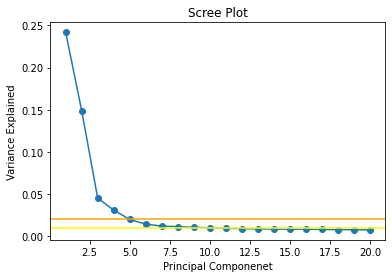

In [18]:
PCA_values = np.arange(PCA20.n_components_) + 1
plt.plot(PCA_values, PCA20.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Componenet')
plt.ylabel('Variance Explained')
plt.axhline(0.02, color='orange')
plt.axhline(0.01, color='yellow')
plt.show()

In [19]:
pd.DataFrame({
    'PC': PCA_values,
    'Expl Variance': PCA20.explained_variance_ratio_}).head(10)

,PC,Expl Variance
0,1,0.241967
1,2,0.148914
2,3,0.045173
3,4,0.030862
4,5,0.019775
5,6,0.014267
6,7,0.011892
7,8,0.011268
8,9,0.010443
9,10,0.009920


In [20]:
PCA5 = PCA(n_components=5, random_state=1).fit(train.drop(columns='target'))
npPCA5 = PCA5.transform(train.drop(columns='target'))
dfPCA5 = pd.DataFrame(npPCA5)
dfPCA5['target'] = train['target']
dfPCA5.head()

,0,1,2,3,4,target
0,0.006646,0.069854,-0.023743,0.018470,-0.004189,Streptococcus_pyogenes
1,-0.025797,0.006773,-0.008334,-0.003302,-0.008507,Salmonella_enterica
2,-0.029070,-0.005515,0.000657,-0.001592,0.002291,Salmonella_enterica
3,-0.032686,-0.006226,0.005941,0.003985,0.002151,Salmonella_enterica
4,0.042883,0.053586,0.009960,-0.011809,0.040482,Enterococcus_hirae


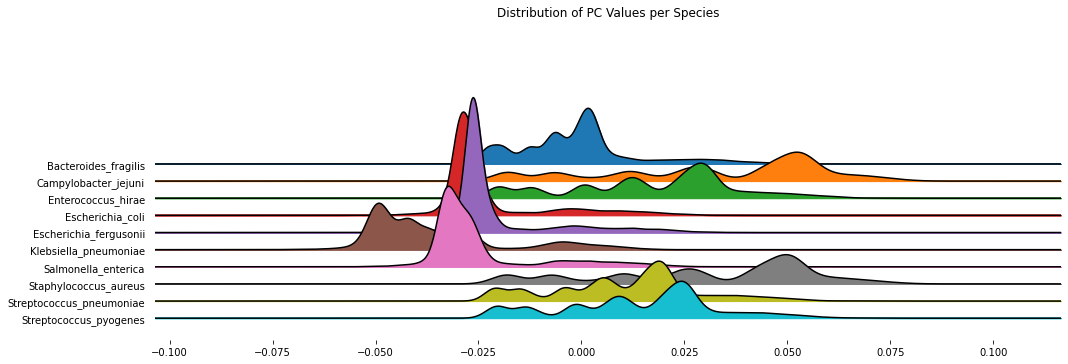

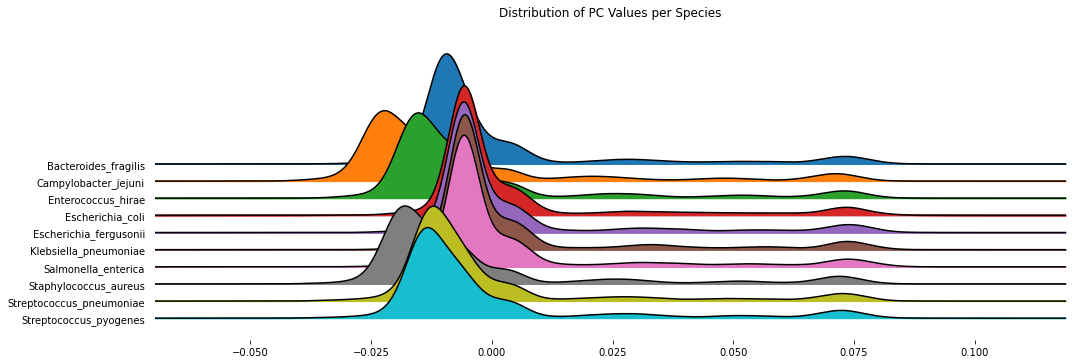

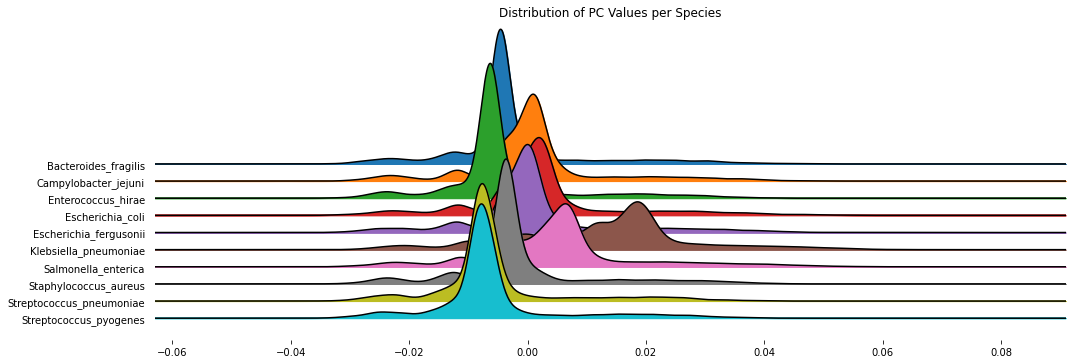

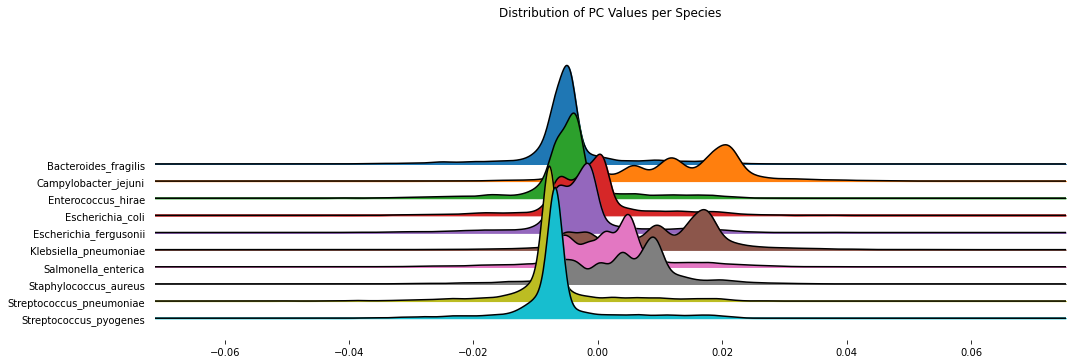

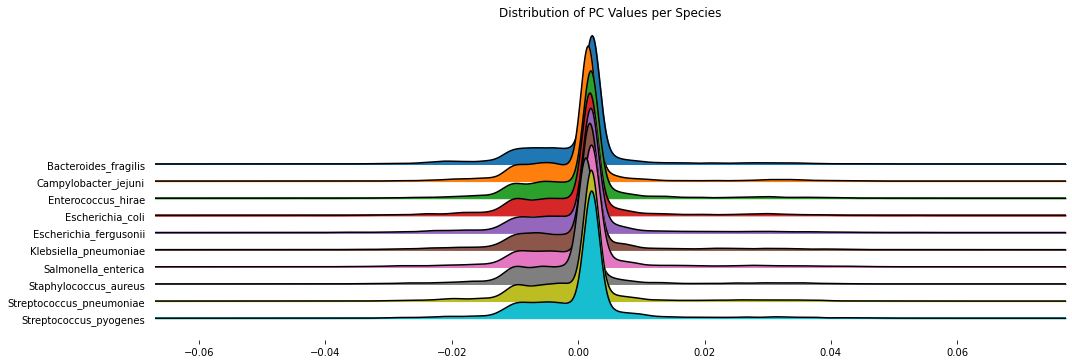

In [22]:
for i in range(5):
    dfSubset = dfPCA5[[i, 'target']]
    fig, axes = joypy.joyplot(dfSubset, by='target', colormap=cm.tab10, overlap=3, figsize=(15,5), fill=True)
    axes[0].set_title('Distribution of PC Values per Species')